In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
science_data = pd.read_csv('Quizzes Data - Sheet3.csv')
science_data

,Before,Unnamed: 1,After,Unnamed: 3
0,Feeling,Percent,Feeling,Percent
1,Bored,11,Bored,12
2,Not Great,5,Not Great,6
3,OK,40,OK,14
4,Kind of Interested,25,Kind of Interested,30
5,Excited,19,Excited,38


## Clean

### Data Tidiness

#### 1. First row is column information, not data

In [3]:
science_data = science_data.rename(columns={"Before": "Before Feeling", "Unnamed: 1": "Before Percentage", "After": "After Feeling", "Unnamed: 3": "After Percentage"})

### Data Quality

In [4]:
science_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Before Feeling     6 non-null      object
 1   Before Percentage  6 non-null      object
 2   After Feeling      6 non-null      object
 3   After Percentage   6 non-null      object
dtypes: object(4)
memory usage: 320.0+ bytes


#### 1. Row 1 contains irrelevant information after Data Tidiness step was completed

In [5]:
science_data = science_data.drop([0])

Test

In [6]:
science_data

,Before Feeling,Before Percentage,After Feeling,After Percentage
1,Bored,11,Bored,12
2,Not Great,5,Not Great,6
3,OK,40,OK,14
4,Kind of Interested,25,Kind of Interested,30
5,Excited,19,Excited,38


#### 2. Datatype for Percent columns should be numerical

In [7]:
science_data['Before Percentage'] = science_data['Before Percentage'].astype(float)
science_data['After Percentage'] = science_data['After Percentage'].astype(float)

Test

In [8]:
science_data

,Before Feeling,Before Percentage,After Feeling,After Percentage
1,Bored,11.0,Bored,12.0
2,Not Great,5.0,Not Great,6.0
3,OK,40.0,OK,14.0
4,Kind of Interested,25.0,Kind of Interested,30.0
5,Excited,19.0,Excited,38.0


## Analysis

Do kids feel more bored or excited before or after science camp?

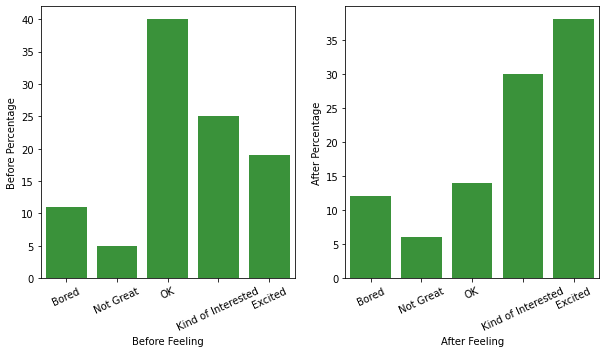

In [25]:
base_color = sns.color_palette()[2]

plt.figure(figsize=[10,5])
plt.subplot(1, 2, 1)
sns.barplot(data=science_data, x='Before Feeling', y='Before Percentage', color=base_color)
plt.xticks(rotation=25)
plt.subplot(1, 2, 2)
sns.barplot(data=science_data, x='After Feeling', y='After Percentage', color=base_color)
plt.xticks(rotation=25);

Examine the change in feeling by creating a new column to compute the difference

In [26]:
science_data['Feeling Change'] = science_data['After Percentage'] - science_data['Before Percentage']

In [27]:
science_data

,Before Feeling,Before Percentage,After Feeling,After Percentage,Feeling Change
1,Bored,11.0,Bored,12.0,1.0
2,Not Great,5.0,Not Great,6.0,1.0
3,OK,40.0,OK,14.0,-26.0
4,Kind of Interested,25.0,Kind of Interested,30.0,5.0
5,Excited,19.0,Excited,38.0,19.0


In [31]:
plt.figure(figsize=[10,5])
plt.bar(data=science_data, x = 'After Feeling', y = 'Feeling Change')



TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 720x360 with 0 Axes>